In [2]:
!pip install seaborn --upgrade
!pip install openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
df_a = pd.read_csv('/content/gdrive/MyDrive/BA-Programmcode/Auswertung_Umfrage/UserSurvey_Chatbots_A.csv')
df_b = pd.read_csv('/content/gdrive/MyDrive/BA-Programmcode/Auswertung_Umfrage/UserSurvey_Chatbots_B.csv')
df_gesamt =  pd.read_excel('/content/gdrive/MyDrive/BA-Programmcode/Auswertung_Umfrage/gesamt_Umfrage.xlsx')

gesamt_df_rating = pd.DataFrame()
rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}
neues_df = []

for i in range(5, 29):
      neues_df[df_gesamt.columns[i]] = df_gesamt.iloc[:, i].replace(rating_map)





summen_chatbot1 = neues_df.iloc[:, ::2].sum()
GesamtSumme_chatbot1 = sum(summen_chatbot1) - 45

# Summe der ungeraden Spalten
summe_chatbot2 = neues_df.iloc[:, 1::2].sum()
GesamtSumme_chatbot2= sum(summe_chatbot2) - 46

print(GesamtSumme_chatbot1)
print(GesamtSumme_chatbot2)

Score_chatbot1 = (GesamtSumme_chatbot1/55/28)*100
Score_chatbot2 = (GesamtSumme_chatbot2/55/28)*100

print(Score_chatbot1)
print(Score_chatbot2)

TypeError: list indices must be integers or slices, not str

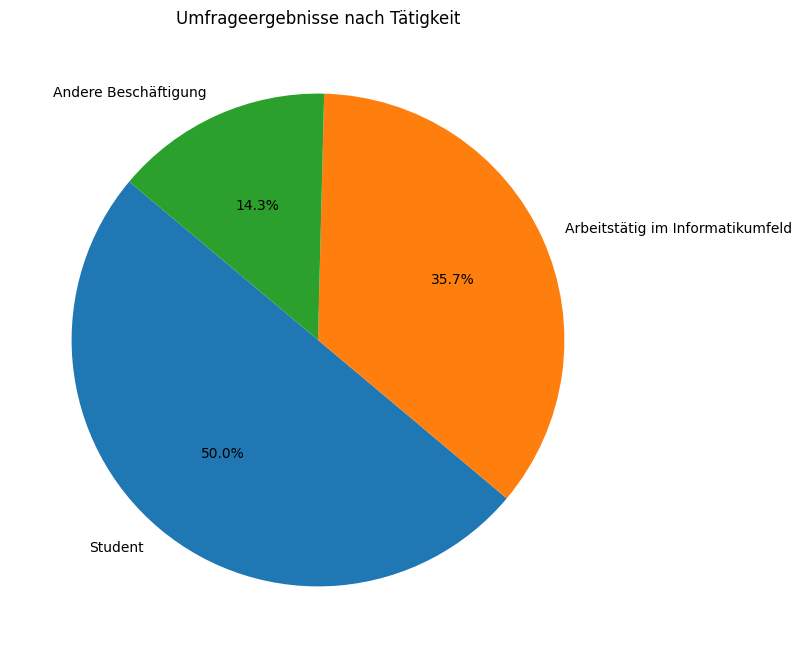

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Berechnung der Anteile für jede Kategorie
anteile = df_gesamt["Bitte geben Sie ihre aktuelle Tätigkeit an´"].value_counts()

# Erstellung des Pie Charts
plt.figure(figsize=(8, 8))
plt.pie(anteile, labels=anteile.index, autopct='%1.1f%%', startangle=140)
plt.title("Umfrageergebnisse nach Tätigkeit")
plt.show()


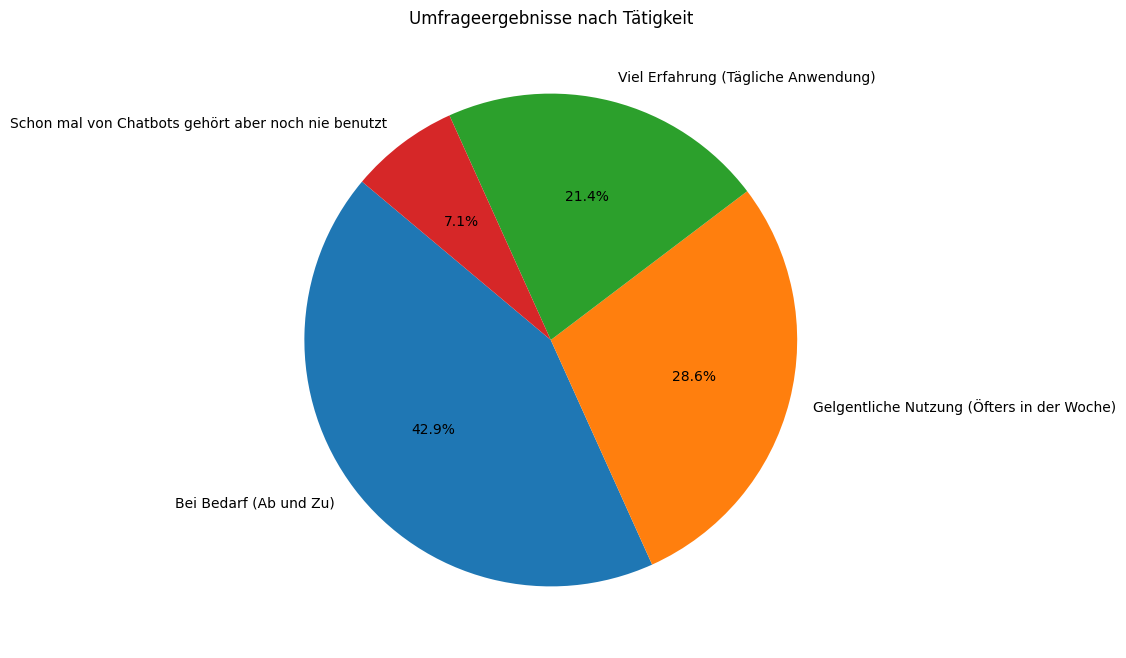

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Berechnung der Anteile für jede Kategorie
anteile = df_gesamt["Geben bitte Ihren Grad an Vorerfahrung mit Chatbots an [Zeile 1]"].value_counts()

# Erstellung des Pie Charts
plt.figure(figsize=(8, 8))
plt.pie(anteile, labels=anteile.index, autopct='%1.1f%%', startangle=140)
plt.title("Umfrageergebnisse nach Tätigkeit")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Spaltennamen für die Visualisierung
column_chatbot1 = "1. Die Persönlichkeit des Chatbots entsprach einem Beratungsgespräch mit einer echten Person [ Chatbot 1]"
column_chatbot2 = "1. Die Persönlichkeit des Chatbots entsprach einem Beratungsgespräch mit einer echten Person [Chatbot 2]"

rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}

df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_selected)
plt.title("Vergleich der Bewertungen zwischen Chatbot 1 und Chatbot 2")
plt.ylabel("Bewertung")
plt.xlabel("Die Persönlichkeit des Chatbots entsprach einem Beratungsgespräch mit einer echten Person")
plt.xticks([0, 1], ["Chatbot 1", "Chatbot 2"])
plt.yticks(range(1, 6), ["Trifft überhaupt nicht zu", "Trifft nicht zu", "Neutral", "Stimme zu", "Stimme absolut zu"])
plt.legend(title="Rating Map", labels=[f"{key} ({value})" for key, value in rating_map.items()], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




colors = ["skyblue", "lightcoral"]

plt.figure(figsize=(12, 6))
sns.histplot(data=df_selected, bins=5, kde=True, palette=colors)
plt.title("Verteilung der Bewertungen zwischen Chatbot 1 und Chatbot 2")
plt.xlabel("Bewertung")
plt.ylabel("Häufigkeit")

# Erstelle die Chatbots Legende
chatbot_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
chatbot_labels = ["Chatbot 1", "Chatbot 2"]
plt.legend(chatbot_handles, chatbot_labels, title="Chatbots", bbox_to_anchor=(1.05, 1), loc='upper left')

# Erstelle die Rating Map Legende manuell
rating_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
rating_labels = ["Trifft überhaupt nicht zu", "Trifft nicht zu", "Neutral", "Stimme zu", "Stimme absolut zu"]
rating_legend = plt.legend(rating_handles, rating_labels, title="Rating Map", bbox_to_anchor=(1.05, 0), loc='lower left')

# Füge die Rating Map Legende zum Plot hinzu
plt.gca().add_artist(rating_legend)

plt.tight_layout()
plt.show()


colors = ["skyblue", "lightcoral"]

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_selected, shade=True, palette=colors)
plt.title("Verteilung der Bewertungen zwischen Chatbot 1 und Chatbot 2")
plt.xlabel("Bewertung")
plt.ylabel("Dichte")

# Erstelle die Chatbots Legende
chatbot_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
chatbot_labels = ["Chatbot 1", "Chatbot 2"]
plt.legend(chatbot_handles, chatbot_labels, title="Chatbots")

plt.tight_layout()
plt.show()


statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für Chatbot 1:")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für Chatbot 2:")
print(statistiken_chatbot2)




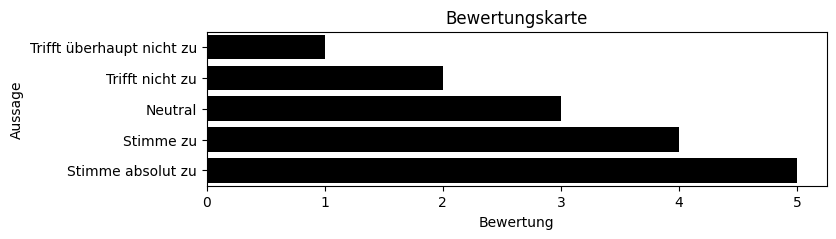

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bewertungskarte
rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}

# Umwandeln der Bewertungskarte in ein DataFrame für die Verwendung von Seaborn
rating_df = pd.DataFrame(list(rating_map.items()), columns=['Aussage', 'Bewertung'])

# Erstellen eines horizontalen Balkenplots in Schwarz-Weiß
plt.figure(figsize=(8, 2))
sns.barplot(x='Bewertung', y='Aussage', data=rating_df, color='black')

# Einstellungen für das Diagramm
plt.title('Bewertungskarte')
plt.xlabel('Bewertung')
plt.ylabel('Aussage')

# Anzeigen des Diagramms
plt.show()


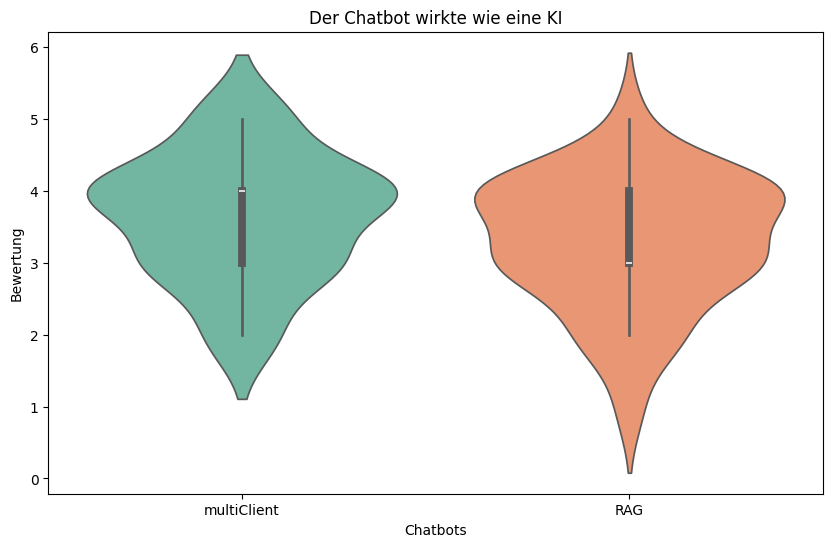

Statistiken für multiClient:
count    28.000000
mean      3.642857
std       0.869835
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: 2. Der Chatbot wirkt wie eine KI [Chatbot 1], dtype: float64
Statistiken für RAG:
count    28.000000
mean      3.285714
std       0.896790
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: 2. Der Chatbot wirkt wie eine KI [Chatbot 2], dtype: float64


In [ ]:
# Für die 2te Frage Der Chatbot wirkt wie eine KI [
import seaborn as sns
import matplotlib.pyplot as plt

# Spaltennamen für die Visualisierung
column_chatbot1 = "2. Der Chatbot wirkt wie eine KI [Chatbot 1]"
column_chatbot2 = "2. Der Chatbot wirkt wie eine KI [Chatbot 2]"


rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}
df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_selected, palette="Set2")
plt.title("Der Chatbot wirkte wie eine KI")
plt.xlabel("Chatbots")
plt.ylabel("Bewertung")
plt.xticks([0, 1], ["multiClient", "RAG"])

# Anzeigen des Violinplots
plt.show()

statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für multiClient:")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für RAG:")
print(statistiken_chatbot2)


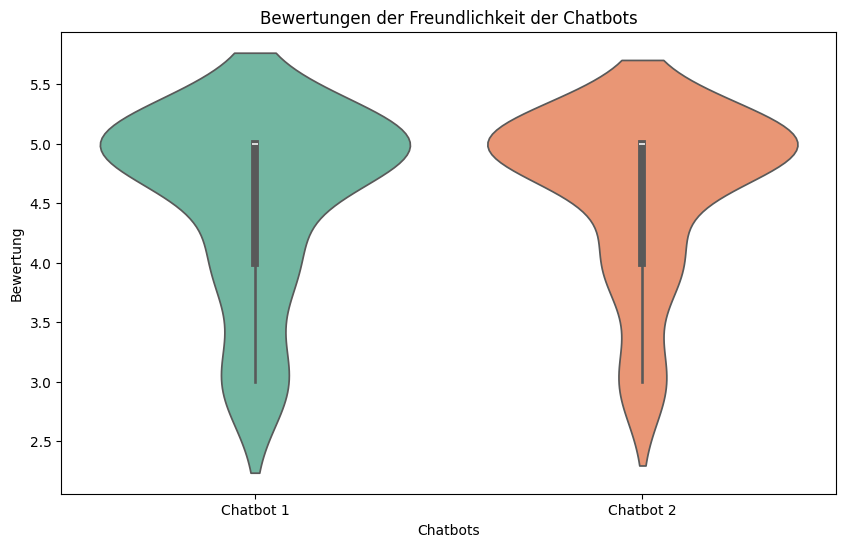

Statistiken für Chatbot 1:
count    28.000000
mean      4.535714
std       0.744468
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: 3. Der Chatbot war freundlich während der Benutzung [Chatbot 1], dtype: float64
Statistiken für Chatbot 2:
count    28.000000
mean      4.607143
std       0.685257
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: 3. Der Chatbot war freundlich während der Benutzung [Chatbot 2], dtype: float64


In [ ]:
#Statistik für Frage 3


# Spaltennamen für die Visualisierung
import seaborn as sns
import matplotlib.pyplot as plt

# Spaltennamen für die Visualisierung
column_chatbot1 = "3. Der Chatbot war freundlich während der Benutzung [Chatbot 1]"
column_chatbot2 = "3. Der Chatbot war freundlich während der Benutzung [Chatbot 2]"

rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}
df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

# Erstellen des Violinplots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_selected, palette="Set2")
plt.title("Bewertungen der Freundlichkeit der Chatbots")
plt.xlabel("Chatbots")
plt.ylabel("Bewertung")
plt.xticks([0, 1], ["Chatbot 1", "Chatbot 2"])

# Anzeigen des Violinplots
plt.show()


statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für Chatbot 1:")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für Chatbot 2:")
print(statistiken_chatbot2)



In [ ]:
#Statistik für Frage 4

import seaborn as sns
import matplotlib.pyplot as plt

# Spaltennamen für die Visualisierung




column_chatbot1 = "4. Der Chatbot erklärte seinen Anwendungsbereich und Zweck gut  [Chatbot 1]"
column_chatbot2 = "4. Der Chatbot erklärte seinen Anwendungsbereich und Zweck gut  [Chatbot 2]"

rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}

df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

print(df_selected)


statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für Chatbot 1:")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für Chatbot 2:")
print(statistiken_chatbot2)


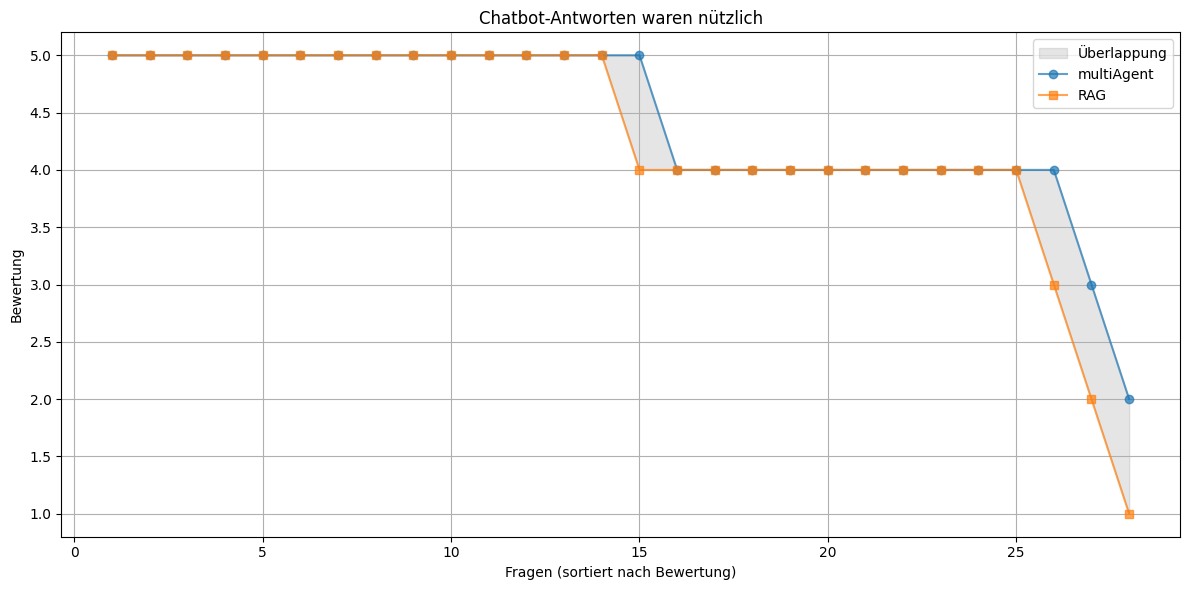

Statistiken für nMultiAgent
count    28.000000
mean      4.428571
std       0.741798
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: 5. Der Chatbot hat mich regelmäßig informiert welche weitere Informationen zu dem Schuh wichtig wären [Chatbot 1], dtype: float64
Statistiken für RAG
count    28.000000
mean      4.285714
std       0.975900
min       1.000000
25%       4.000000
50%       4.500000
75%       5.000000
max       5.000000
Name: 5. Der Chatbot hat mich regelmäßig informiert welche weitere Informationen zu dem Schuh wichtig wären [Chatbot 2], dtype: float64


In [ ]:
#Statistik für Frage 5

import seaborn as sns
import matplotlib.pyplot as plt

# Spaltennamen für die Visualisierung
column_chatbot1 = "5. Der Chatbot hat mich regelmäßig informiert welche weitere Informationen zu dem Schuh wichtig wären [Chatbot 1]"
column_chatbot2 = "5. Der Chatbot hat mich regelmäßig informiert welche weitere Informationen zu dem Schuh wichtig wären [Chatbot 2]"

rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}

df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

# Sortieren der Daten für bessere Sichtbarkeit der Unterschiede
chatbot1_data = np.sort(df_selected[column_chatbot1].values)[::-1]  # Chatbot 1 Daten sortieren
chatbot2_data = np.sort(df_selected[column_chatbot2].values)[::-1]  # Chatbot 2 Daten sortieren

# Anzahl der Fragen bzw. Y-Achse
num_questions = len(df_selected)

# Erstellen des Linienplots mit farbiger Hervorhebung der Überlappung
plt.figure(figsize=(12, 6))
plt.fill_between(np.arange(1, num_questions + 1), chatbot1_data, chatbot2_data, alpha=0.2, label='Überlappung', color='gray')
plt.plot(np.arange(1, num_questions + 1), chatbot1_data, marker='o', label='multiAgent', alpha=0.7)
plt.plot(np.arange(1, num_questions + 1), chatbot2_data, marker='s', label='RAG', alpha=0.7)

# Beschriftungen und Titel
plt.xlabel('Fragen (sortiert nach Bewertung)')
plt.ylabel('Bewertung')
plt.title('Chatbot-Antworten waren nützlich')
plt.legend()

# Anzeigen des Linienplots
plt.grid(True)
plt.tight_layout()
plt.show()


statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für nMultiAgent")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für RAG")
print(statistiken_chatbot2)


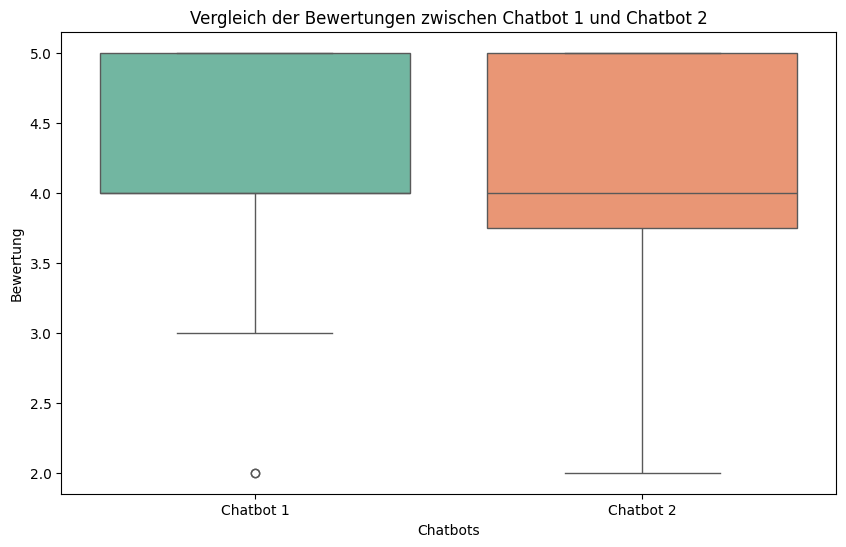

Statistiken für Chatbot 1:
count    28.000000
mean      4.107143
std       0.831745
min       2.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: 6. Der Chatbot war einfach/intuitiv zu nutzen  [Chatbot 1], dtype: float64
Statistiken für Chatbot 2:
count    28.000000
mean      4.000000
std       0.816497
min       2.000000
25%       3.750000
50%       4.000000
75%       5.000000
max       5.000000
Name: 6. Der Chatbot war einfach/intuitiv zu nutzen  [Chatbot 2], dtype: float64


In [ ]:
#Statistik für Frage 6

import seaborn as sns
import matplotlib.pyplot as plt

# Spaltennamen für die Visualisierung
column_chatbot1 = "6. Der Chatbot war einfach/intuitiv zu nutzen  [Chatbot 1]"
column_chatbot2 = "6. Der Chatbot war einfach/intuitiv zu nutzen  [Chatbot 2]"

rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}

df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

# Erstellen des Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected, palette="Set2")
plt.title("Vergleich der Bewertungen zwischen Chatbot 1 und Chatbot 2")
plt.xlabel("Chatbots")
plt.ylabel("Bewertung")
plt.xticks([0, 1], ["Chatbot 1", "Chatbot 2"])

# Anzeigen des Boxplots
plt.show()


statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für Chatbot 1:")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für Chatbot 2:")
print(statistiken_chatbot2)

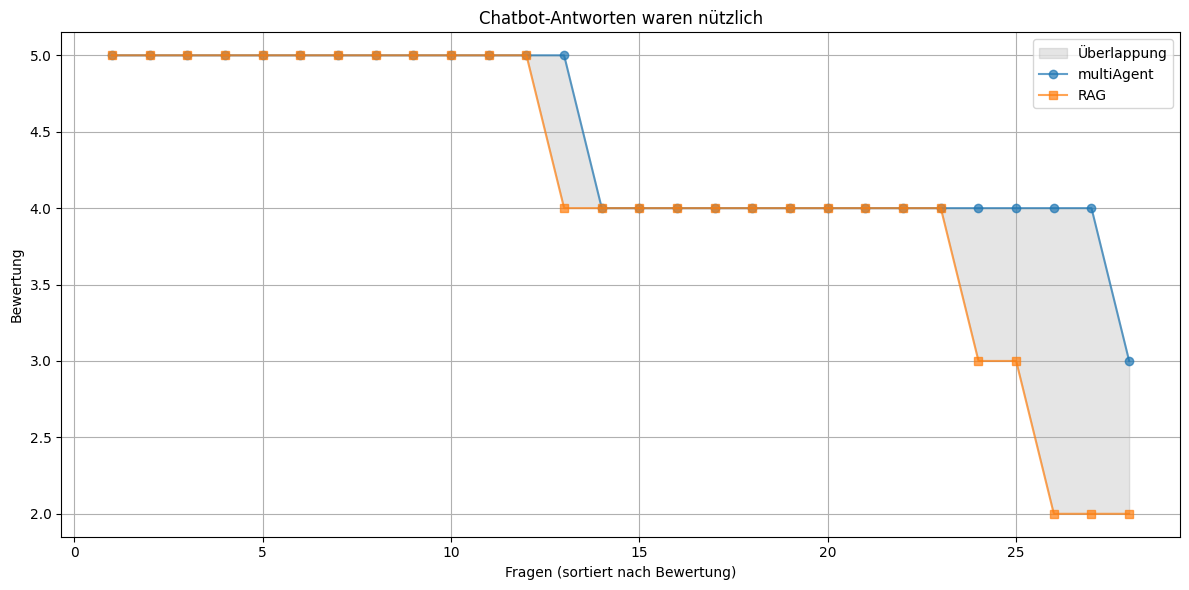

Statistiken für nMultiAgent
count    28.000000
mean      4.428571
std       0.572750
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: 7. Der Chatbot hat mich gut verstanden und hat meine Angaben im weiteren Chatverlauf weiterverwendet [Chatbot 1], dtype: float64
Statistiken für RAG
count    28.000000
mean      4.142857
std       0.970463
min       2.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: 7. Der Chatbot hat mich gut verstanden und hat meine Angaben im weiteren Chatverlauf weiterverwendet [Chatbot 2], dtype: float64


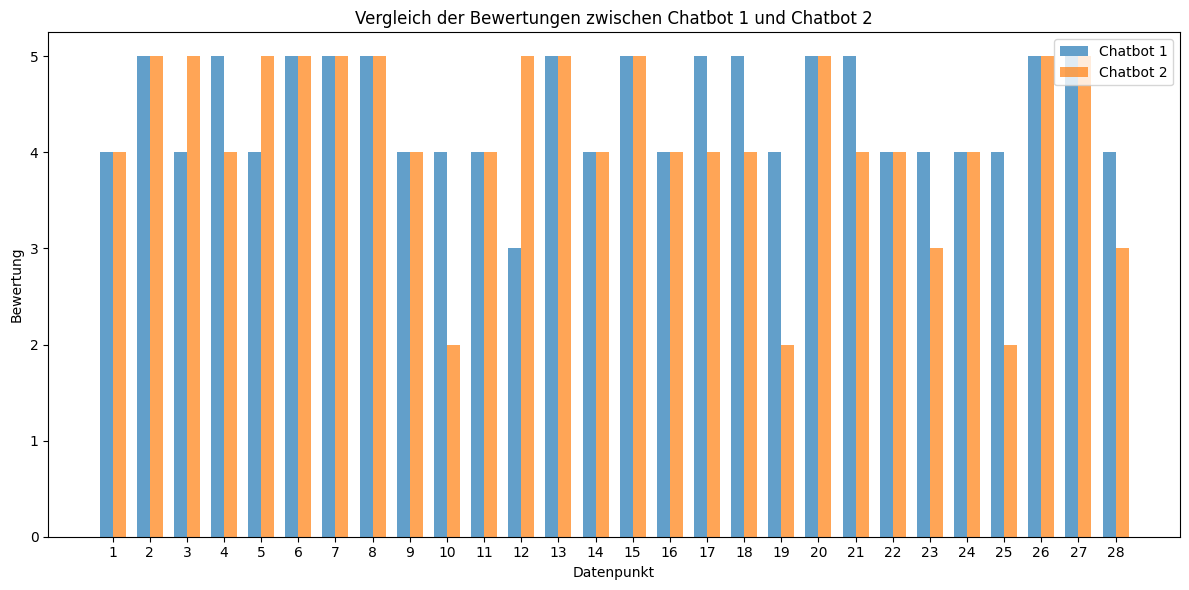

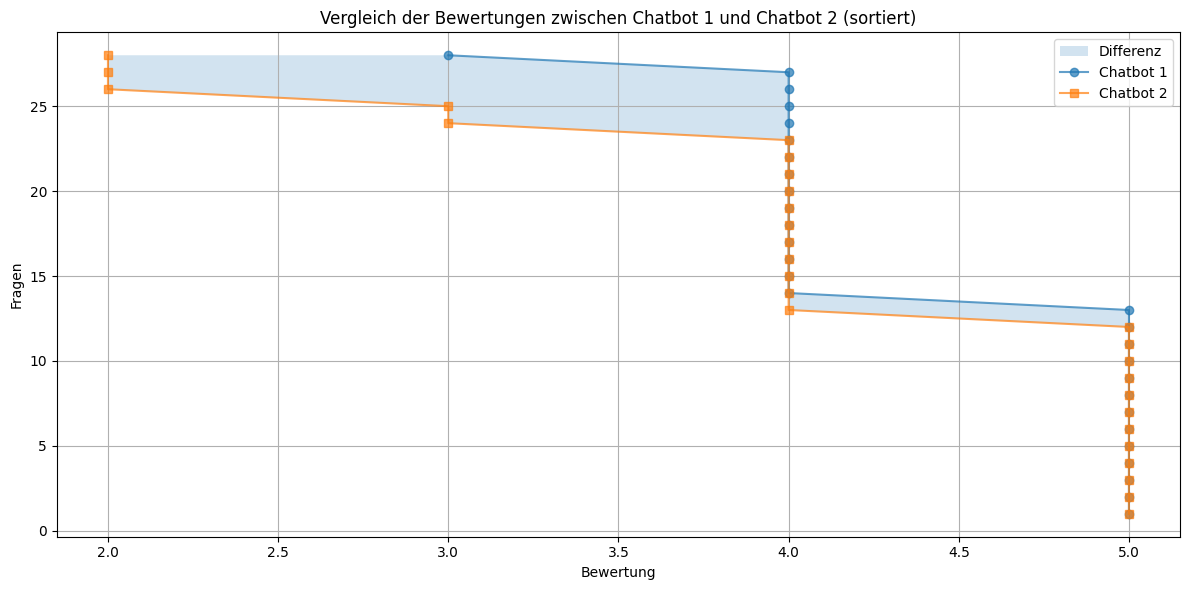

Statistiken für Chatbot 1:
count    28.000000
mean      4.428571
std       0.572750
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: 7. Der Chatbot hat mich gut verstanden und hat meine Angaben im weiteren Chatverlauf weiterverwendet [Chatbot 1], dtype: float64
Statistiken für Chatbot 2:
count    28.000000
mean      4.142857
std       0.970463
min       2.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: 7. Der Chatbot hat mich gut verstanden und hat meine Angaben im weiteren Chatverlauf weiterverwendet [Chatbot 2], dtype: float64


In [ ]:
#Statistik für Frage 7

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Spaltennamen für die Visualisierung
column_chatbot1 = "7. Der Chatbot hat mich gut verstanden und hat meine Angaben im weiteren Chatverlauf weiterverwendet [Chatbot 1]"
column_chatbot2 = "7. Der Chatbot hat mich gut verstanden und hat meine Angaben im weiteren Chatverlauf weiterverwendet [Chatbot 2]"

rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}


df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

# Sortieren der Daten für bessere Sichtbarkeit der Unterschiede
chatbot1_data = np.sort(df_selected[column_chatbot1].values)[::-1]  # Chatbot 1 Daten sortieren
chatbot2_data = np.sort(df_selected[column_chatbot2].values)[::-1]  # Chatbot 2 Daten sortieren

# Anzahl der Fragen bzw. Y-Achse
num_questions = len(df_selected)

# Erstellen des Linienplots mit farbiger Hervorhebung der Überlappung
plt.figure(figsize=(12, 6))
plt.fill_between(np.arange(1, num_questions + 1), chatbot1_data, chatbot2_data, alpha=0.2, label='Überlappung', color='gray')
plt.plot(np.arange(1, num_questions + 1), chatbot1_data, marker='o', label='multiAgent', alpha=0.7)
plt.plot(np.arange(1, num_questions + 1), chatbot2_data, marker='s', label='RAG', alpha=0.7)

# Beschriftungen und Titel
plt.xlabel('Fragen (sortiert nach Bewertung)')
plt.ylabel('Bewertung')
plt.title('Chatbot-Antworten waren nützlich')
plt.legend()

# Anzeigen des Linienplots
plt.grid(True)
plt.tight_layout()
plt.show()


statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für nMultiAgent")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für RAG")
print(statistiken_chatbot2)



import matplotlib.pyplot as plt
import numpy as np

# Daten aus den Pandas DataFrames
data_chatbot1 = df_selected[column_chatbot1].tolist()
data_chatbot2 = df_selected[column_chatbot2].tolist()

# Anzahl der Datenpunkte
num_data_points = len(data_chatbot1)

# X-Achsenwerte für die Balken
x_values = np.arange(num_data_points)

# Breite der Balken
bar_width = 0.35

# Erstellen des Balkendiagramms
plt.figure(figsize=(12, 6))
plt.bar(x_values, data_chatbot1, bar_width, label="Chatbot 1", alpha=0.7)
plt.bar(x_values + bar_width, data_chatbot2, bar_width, label="Chatbot 2", alpha=0.7)

# Beschriftungen und Titel
plt.xlabel("Datenpunkt")
plt.ylabel("Bewertung")
plt.title("Vergleich der Bewertungen zwischen Chatbot 1 und Chatbot 2")
plt.xticks(x_values + bar_width / 2, range(1, num_data_points + 1))
plt.legend()

# Anzeigen des Balkendiagramms
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import numpy as np

# Daten für die beiden Chatbots
chatbot1_data = np.sort(df_selected[column_chatbot1].values)[::-1]  # Sortiere von hoch nach niedrig
chatbot2_data = np.sort(df_selected[column_chatbot2].values)[::-1]  # Sortiere von hoch nach niedrig

# Anzahl der Fragen bzw. Y-Achse
num_questions = len(df_selected)

# Erstellen des Linienplots
plt.figure(figsize=(12, 6))
plt.fill_betweenx(np.arange(1, num_questions + 1), chatbot1_data, chatbot2_data, alpha=0.2, label='Differenz')
plt.plot(chatbot1_data, np.arange(1, num_questions + 1), marker='o', label='Chatbot 1', alpha=0.7)
plt.plot(chatbot2_data, np.arange(1, num_questions + 1), marker='s', label='Chatbot 2', alpha=0.7)

# Beschriftungen und Titel
plt.xlabel('Bewertung')
plt.ylabel('Fragen')
plt.title('Vergleich der Bewertungen zwischen Chatbot 1 und Chatbot 2 (sortiert)')
plt.legend()

# Anzeigen des Linienplots
plt.grid(True)
plt.tight_layout()
plt.show()






statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für Chatbot 1:")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für Chatbot 2:")
print(statistiken_chatbot2)

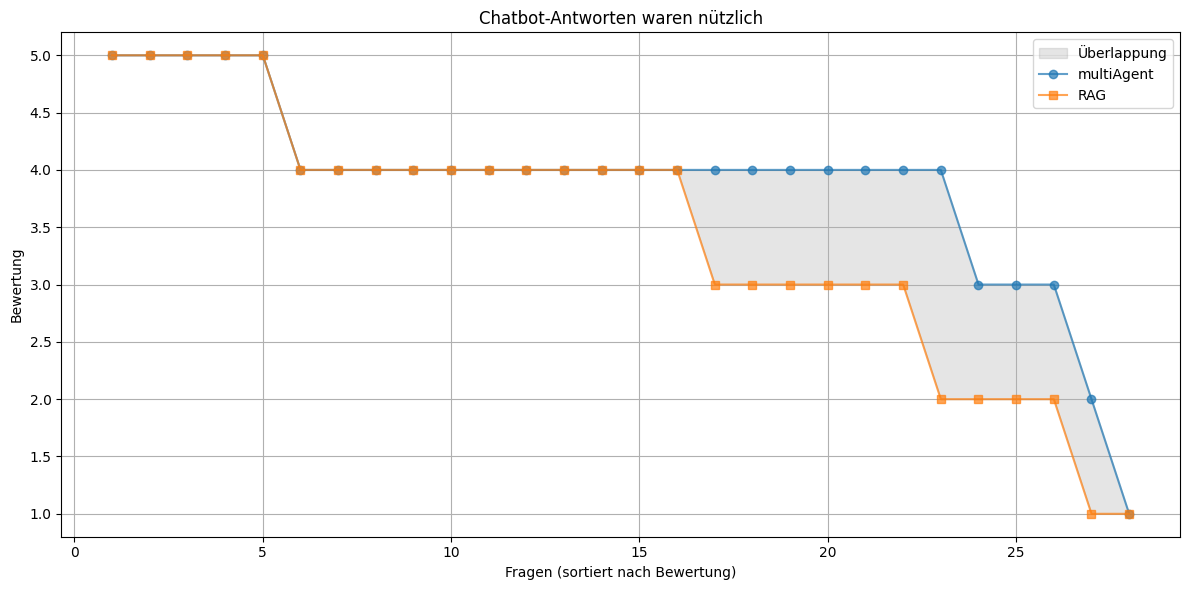

Statistiken für nMultiAgent
count    28.000000
mean      3.892857
std       0.875142
min       1.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: 8. Chatbot-Antworten waren nützlich [Chatbot 1], dtype: float64
Statistiken für RAG
count    28.000000
mean      3.464286
std       1.170063
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: 8. Chatbot-Antworten waren nützlich [Chatbot 2], dtype: float64


In [ ]:
#Frage 8
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Spaltennamen für die Visualisierung
column_chatbot1 = "8. Chatbot-Antworten waren nützlich [Chatbot 1]"
column_chatbot2 = "8. Chatbot-Antworten waren nützlich [Chatbot 2]"

# Bewertungskarten für die Umwandlung der Werte
rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}

# Daten auswählen und Bewertungen umwandeln
df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

# Sortieren der Daten für bessere Sichtbarkeit der Unterschiede
chatbot1_data = np.sort(df_selected[column_chatbot1].values)[::-1]  # Chatbot 1 Daten sortieren
chatbot2_data = np.sort(df_selected[column_chatbot2].values)[::-1]  # Chatbot 2 Daten sortieren

# Anzahl der Fragen bzw. Y-Achse
num_questions = len(df_selected)

# Erstellen des Linienplots mit farbiger Hervorhebung der Überlappung
plt.figure(figsize=(12, 6))
plt.fill_between(np.arange(1, num_questions + 1), chatbot1_data, chatbot2_data, alpha=0.2, label='Überlappung', color='gray')
plt.plot(np.arange(1, num_questions + 1), chatbot1_data, marker='o', label='multiAgent', alpha=0.7)
plt.plot(np.arange(1, num_questions + 1), chatbot2_data, marker='s', label='RAG', alpha=0.7)

# Beschriftungen und Titel
plt.xlabel('Fragen (sortiert nach Bewertung)')
plt.ylabel('Bewertung')
plt.title('Chatbot-Antworten waren nützlich')
plt.legend()

# Anzeigen des Linienplots
plt.grid(True)
plt.tight_layout()
plt.show()


statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für nMultiAgent")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für RAG")
print(statistiken_chatbot2)


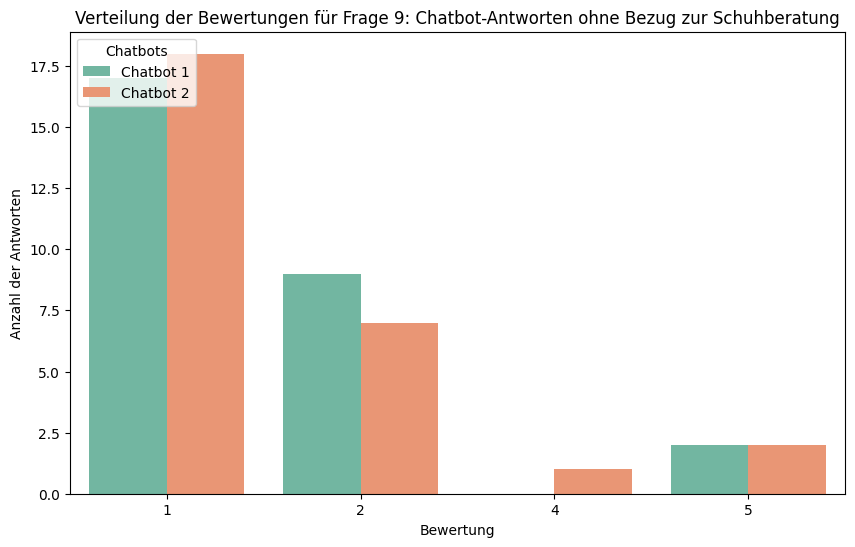

Statistiken für Chatbot 1:
count    28.000000
mean      1.607143
std       1.065947
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: 9. Der Chatbot hat Anworten gegeben die nichts mit der Schuhberatung zu tuen hatten [Chatbot 1], dtype: float64
Statistiken für Chatbot 2:
count    28.000000
mean      1.642857
std       1.161553
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: 9. Der Chatbot hat Anworten gegeben die nichts mit der Schuhberatung zu tuen hatten [Chatbot 2], dtype: float64


In [ ]:
#Statistik für Frage 9

import seaborn as sns
import matplotlib.pyplot as plt

# Spaltennamen für die Visualisierung



column_chatbot1 = "9. Der Chatbot hat Anworten gegeben die nichts mit der Schuhberatung zu tuen hatten [Chatbot 1]"
column_chatbot2 = "9. Der Chatbot hat Anworten gegeben die nichts mit der Schuhberatung zu tuen hatten [Chatbot 2]"

# Bewertungskarten für die Umwandlung der Werte
rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}

# Daten auswählen und Bewertungen umwandeln
df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

# Erstelle ein Balkendiagramm
plt.figure(figsize=(10, 6))
sns.countplot(data=pd.melt(df_selected), x="value", hue="variable", palette="Set2")
plt.title('Verteilung der Bewertungen für Frage 9: Chatbot-Antworten ohne Bezug zur Schuhberatung')
plt.xlabel('Bewertung')
plt.ylabel('Anzahl der Antworten')
plt.legend(title='Chatbots', loc='upper left', labels=['Chatbot 1', 'Chatbot 2'])
plt.show()




statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für multiAgent:")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für RAG:")
print(statistiken_chatbot2)

In [ ]:
#Statistik für Frage 10

import seaborn as sns
import matplotlib.pyplot as plt

# Spaltennamen für die Visualisierung
column_chatbot1 = "10. Der Chatbot war sehr einfach zu bedienen [Chatbot 1]"
column_chatbot2 = "10. Der Chatbot war sehr einfach zu bedienen [Chatbot 2]"
rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}

df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)



statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für Chatbot 1:")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für Chatbot 2:")
print(statistiken_chatbot2)

Statistiken für Chatbot 1:
count    28.000000
mean      4.250000
std       0.700529
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: 10. Der Chatbot war sehr einfach zu bedienen [Chatbot 1], dtype: float64
Statistiken für Chatbot 2:
count    28.000000
mean      4.107143
std       0.737327
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: 10. Der Chatbot war sehr einfach zu bedienen [Chatbot 2], dtype: float64


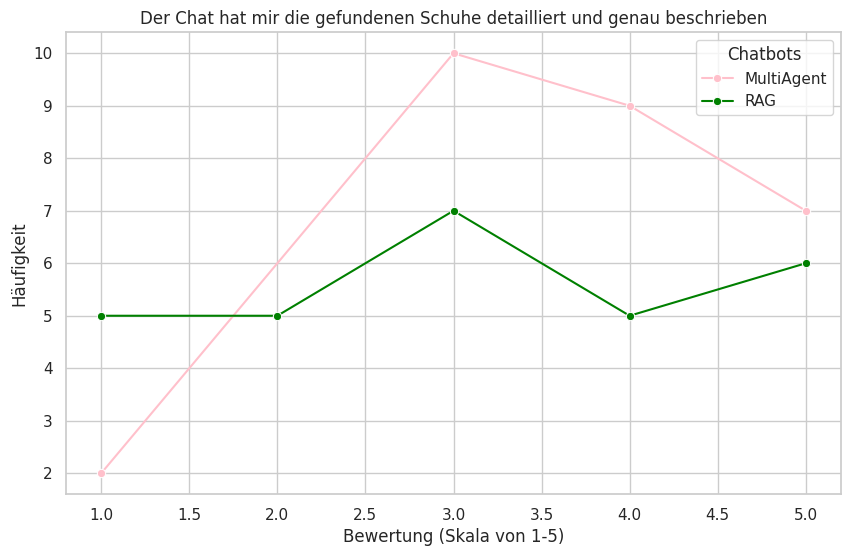

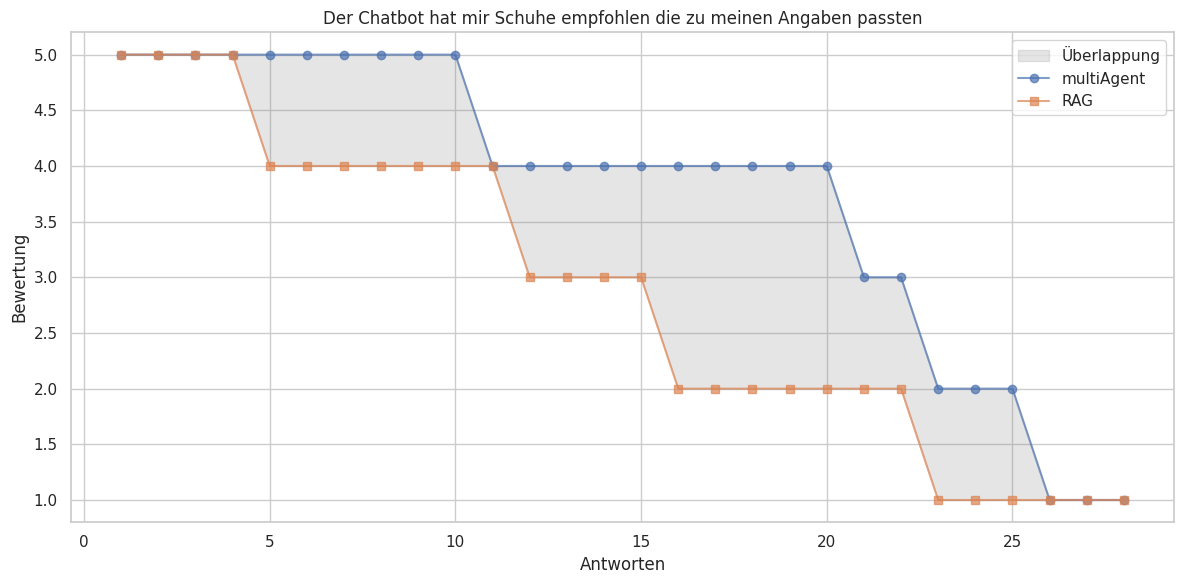

Statistiken für nMultiAgent
count    28.000000
mean      3.750000
std       1.350583
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: 11. Der Chatbot hat mir Schuhe empfohlen die zu meinen Angaben passten [Chatbot 1], dtype: float64
Statistiken für RAG
count    28.000000
mean      2.857143
std       1.406711
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: 11. Der Chatbot hat mir Schuhe empfohlen die zu meinen Angaben passten [Chatbot 2], dtype: float64


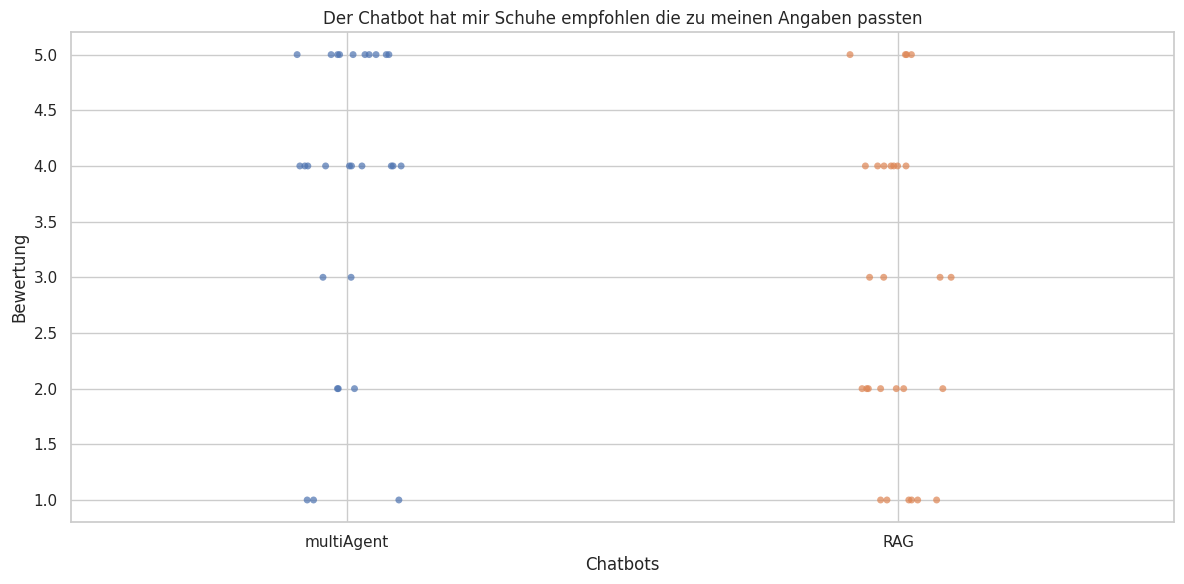

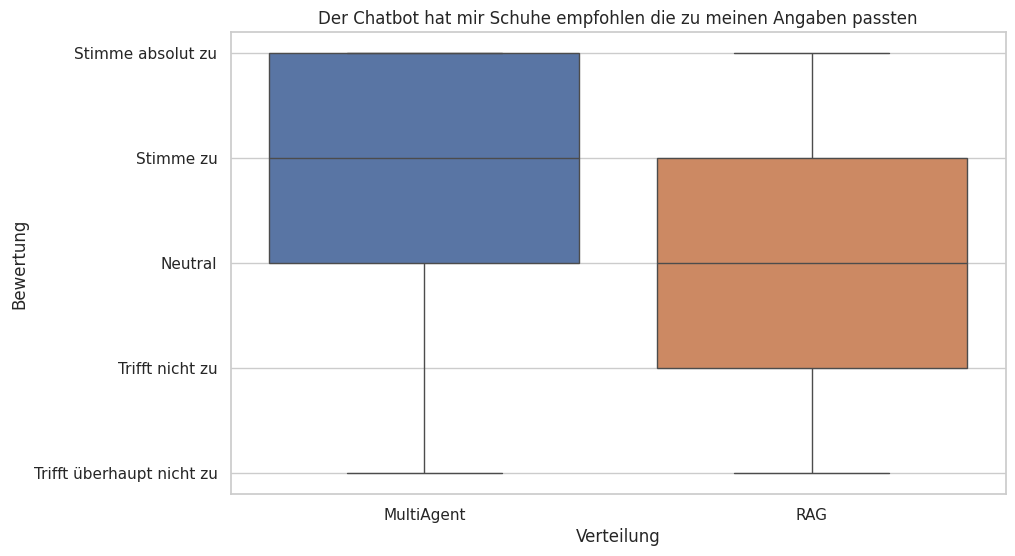

Statistiken für MultiAgent:
count    28.000000
mean      3.750000
std       1.350583
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: 11. Der Chatbot hat mir Schuhe empfohlen die zu meinen Angaben passten [Chatbot 1], dtype: float64
Statistiken für RAG
count    28.000000
mean      2.857143
std       1.406711
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: 11. Der Chatbot hat mir Schuhe empfohlen die zu meinen Angaben passten [Chatbot 2], dtype: float64


In [22]:
# Angenommen, Sie haben bereits einen DataFrame namens `df` mit den spezifizierten Spalten
# "11. Der Chatbot hat mir Schuhe empfohlen die zu meinen Angaben passten [Chatbot 1]" und
# "11. Der Chatbot hat mir Schuhe empfohlen die zu meinen Angaben passten [Chatbot 2]"

df = pd.DataFrame(data)

# Plot mit Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Häufigkeit der Bewertungen pro Chatbot zählen
count_df = pd.DataFrame({
    'MultiAgent': df['MultiAgent'].value_counts().sort_index(),
    'RAG': df['RAG'].value_counts().sort_index(),
}).reset_index()

# Melt DataFrame für den Scatterplot
count_df_melted = count_df.melt(id_vars='index', var_name='Chatbot', value_name='Häufigkeit')

# Scatterplot mit Linien für jeden Chatbot
sns.lineplot(data=count_df_melted[count_df_melted['Chatbot'] == 'MultiAgent'], x="index", y="Häufigkeit", color="pink", marker="o", label="MultiAgent")
sns.lineplot(data=count_df_melted[count_df_melted['Chatbot'] == 'RAG'], x="index", y="Häufigkeit", color="green", marker="o", label="RAG")

# Legende hinzufügen
plt.legend(title='Chatbots', loc='upper right')

# Achsentitel
plt.xlabel('Bewertung (Skala von 1-5)')
plt.ylabel('Häufigkeit')

# Titel hinzufügen
plt.title('Der Chat hat mir die gefundenen Schuhe detailliert und genau beschrieben')

# Diagramm anzeigen
plt.show()





import seaborn as sns
import matplotlib.pyplot as plt

# Spaltennamen für die Visualisierung
column_chatbot1 = "11. Der Chatbot hat mir Schuhe empfohlen die zu meinen Angaben passten [Chatbot 1]"
column_chatbot2 = "11. Der Chatbot hat mir Schuhe empfohlen die zu meinen Angaben passten [Chatbot 2]"

# Umwandlung der Bewertungen in numerische Werte für eine bessere Visualisierung
rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}


df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

# Sortieren der Daten für bessere Sichtbarkeit der Unterschiede
chatbot1_data = np.sort(df_selected[column_chatbot1].values)[::-1]  # Chatbot 1 Daten sortieren
chatbot2_data = np.sort(df_selected[column_chatbot2].values)[::-1]  # Chatbot 2 Daten sortieren

# Anzahl der Fragen bzw. Y-Achse
num_questions = len(df_selected)

# Erstellen des Linienplots mit farbiger Hervorhebung der Überlappung
plt.figure(figsize=(12, 6))
plt.fill_between(np.arange(1, num_questions + 1), chatbot1_data, chatbot2_data, alpha=0.2, label='Überlappung', color='gray')
plt.plot(np.arange(1, num_questions + 1), chatbot1_data, marker='o', label='multiAgent', alpha=0.7)
plt.plot(np.arange(1, num_questions + 1), chatbot2_data, marker='s', label='RAG', alpha=0.7)

# Beschriftungen und Titel
plt.xlabel('Antworten')
plt.ylabel('Bewertung')
plt.title('Der Chatbot hat mir Schuhe empfohlen die zu meinen Angaben passten')
plt.legend()

# Anzeigen des Linienplots
plt.grid(True)
plt.tight_layout()
plt.show()


df = pd.DataFrame(data)

# Plot mit Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Häufigkeit der Bewertungen pro Chatbot zählen
count_df = pd.DataFrame({
    'MultiAgent': df['MultiAgent'].value_counts().sort_index(),
    'RAG': df['RAG'].value_counts().sort_index(),
}).reset_index()

# Melt DataFrame für den Scatterplot
count_df_melted = count_df.melt(id_vars='index', var_name='Chatbot', value_name='Häufigkeit')

# Scatterplot mit Linien für jeden Chatbot
sns.lineplot(data=count_df_melted[count_df_melted['Chatbot'] == 'MultiAgent'], x="index", y="Häufigkeit", color="pink", marker="o", label="MultiAgent")
sns.lineplot(data=count_df_melted[count_df_melted['Chatbot'] == 'RAG'], x="index", y="Häufigkeit", color="green", marker="o", label="RAG")

# Legende hinzufügen
plt.legend(title='Chatbots', loc='upper right')

# Achsentitel
plt.xlabel('Bewertung (Skala von 1-5)')
plt.ylabel('Häufigkeit')

# Titel hinzufügen
plt.title('Der Chat hat mir die gefundenen Schuhe detailliert und genau beschrieben')

# Diagramm anzeigen
plt.show()



statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für nMultiAgent")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für RAG")
print(statistiken_chatbot2)


df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

# Sortieren der Daten für bessere Sichtbarkeit der Unterschiede
chatbot1_data = np.sort(df_selected[column_chatbot1].values)[::-1]  # Chatbot 1 Daten sortieren
chatbot2_data = np.sort(df_selected[column_chatbot2].values)[::-1]  # Chatbot 2 Daten sortieren

# Anzahl der Fragen bzw. Y-Achse
num_questions = len(df_selected)

plt.figure(figsize=(12, 6))
sns.stripplot(data=df_selected, size=5, jitter=True, alpha=0.7)
plt.xticks(np.arange(2), ['multiAgent', 'RAG'])

# Beschriftungen und Titel
plt.xlabel('Chatbots')
plt.ylabel('Bewertung')
plt.title('Der Chatbot hat mir Schuhe empfohlen die zu meinen Angaben passten')
plt.grid(True)
plt.tight_layout()

# Anzeigen des Scatterplots
plt.show()














# Visualisierung der Daten
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected)
plt.title("Der Chatbot hat mir Schuhe empfohlen die zu meinen Angaben passten")
plt.ylabel("Bewertung")
plt.xlabel("Verteilung")
plt.xticks([0, 1], ["MultiAgent", "RAG"])
plt.yticks(range(1, 6), ["Trifft überhaupt nicht zu", "Trifft nicht zu", "Neutral", "Stimme zu", "Stimme absolut zu"])
plt.show()

statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für MultiAgent:")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für RAG")
print(statistiken_chatbot2)




    12. Der Chatbot hat mir die gefunden Schuhe detailliert und genau beschrieben [Chatbot 1]  \
0                                                   1                                           
1                                                   4                                           
2                                                   3                                           
3                                                   5                                           
4                                                   4                                           
5                                                   3                                           
6                                                   5                                           
7                                                   4                                           
8                                                   1                                           
9                             

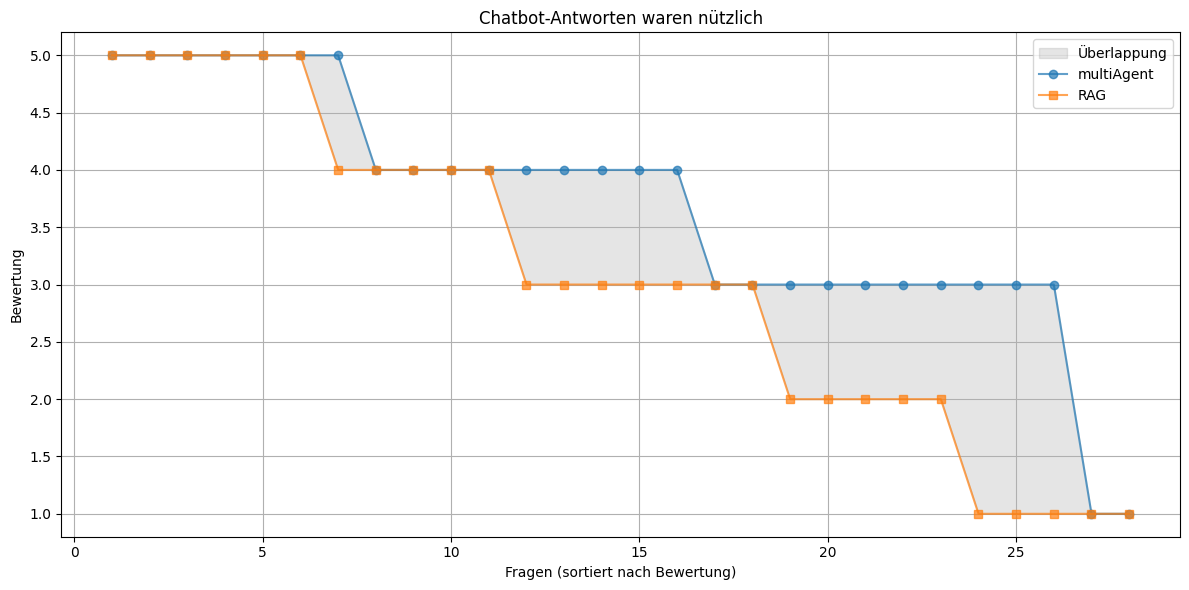

Statistiken für nMultiAgent
count    28.000000
mean      3.678571
std       1.090483
min       1.000000
25%       3.000000
50%       4.000000
75%       4.250000
max       5.000000
Name: 12. Der Chatbot hat mir die gefunden Schuhe detailliert und genau beschrieben [Chatbot 1], dtype: float64
Statistiken für RAG
count    28.000000
mean      3.071429
std       1.412342
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: 12. Der Chatbot hat mir die gefunden Schuhe detailliert und genau beschrieben [Chatbot 2], dtype: float64


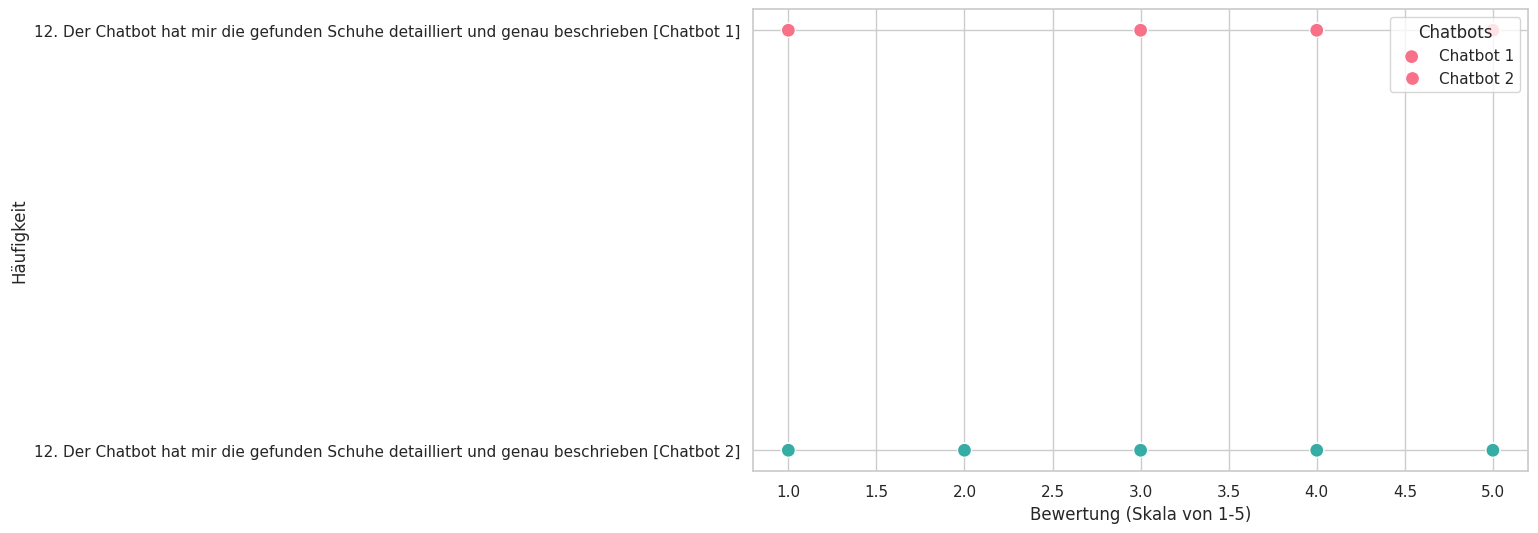

In [13]:
# Frage 12

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Spaltennamen für die Visualisierung
column_chatbot1 = "12. Der Chatbot hat mir die gefunden Schuhe detailliert und genau beschrieben [Chatbot 1]"
column_chatbot2 = "12. Der Chatbot hat mir die gefunden Schuhe detailliert und genau beschrieben [Chatbot 2]"

# Umwandlung der Bewertungen in numerische Werte für eine bessere Visualisierung
rating_map = {
    "Trifft überhaupt nicht zu": 1,
    "Trifft nicht zu": 2,
    "Neutral": 3,
    "Stimme zu": 4,
    "Stimme absolut zu": 5
}

df_selected = df_gesamt[[column_chatbot1, column_chatbot2]].replace(rating_map)

print(df_selected)
# Sortieren der Daten für bessere Sichtbarkeit der Unterschiede
chatbot1_data = np.sort(df_selected[column_chatbot1].values)[::-1]  # Chatbot 1 Daten sortieren
chatbot2_data = np.sort(df_selected[column_chatbot2].values)[::-1]  # Chatbot 2 Daten sortieren

# Anzahl der Fragen bzw. Y-Achse
num_questions = len(df_selected)

# Erstellen des Linienplots mit farbiger Hervorhebung der Überlappung
plt.figure(figsize=(12, 6))
plt.fill_between(np.arange(1, num_questions + 1), chatbot1_data, chatbot2_data, alpha=0.2, label='Überlappung', color='gray')
plt.plot(np.arange(1, num_questions + 1), chatbot1_data, marker='o', label='multiAgent', alpha=0.7)
plt.plot(np.arange(1, num_questions + 1), chatbot2_data, marker='s', label='RAG', alpha=0.7)

# Beschriftungen und Titel
plt.xlabel('Fragen (sortiert nach Bewertung)')
plt.ylabel('Bewertung')
plt.title('Chatbot-Antworten waren nützlich')
plt.legend()

# Anzeigen des Linienplots
plt.grid(True)
plt.tight_layout()
plt.show()


statistiken_chatbot1 = df_selected[column_chatbot1].describe()
print("Statistiken für nMultiAgent")
print(statistiken_chatbot1)

statistiken_chatbot2 = df_selected[column_chatbot2].describe()
print("Statistiken für RAG")
print(statistiken_chatbot2)

# Plot mit Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatterplot
sns.scatterplot(data=df_selected.melt(), x="value", y="variable", hue="variable", palette="husl", s=100)

# Legende hinzufügen
plt.legend(title='Chatbots', loc='upper right', labels=['Chatbot 1', 'Chatbot 2'])

# Achsentitel
plt.xlabel('Bewertung (Skala von 1-5)')
plt.ylabel('Häufigkeit')

# Diagramm anzeigen
plt.show()



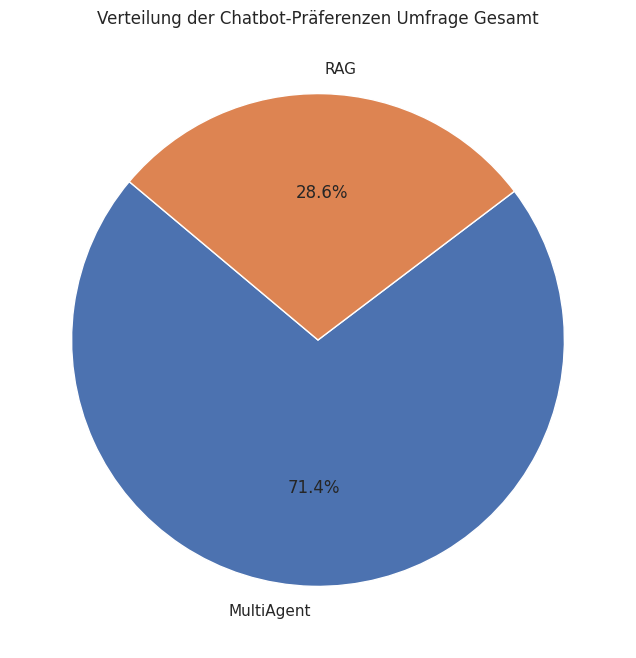

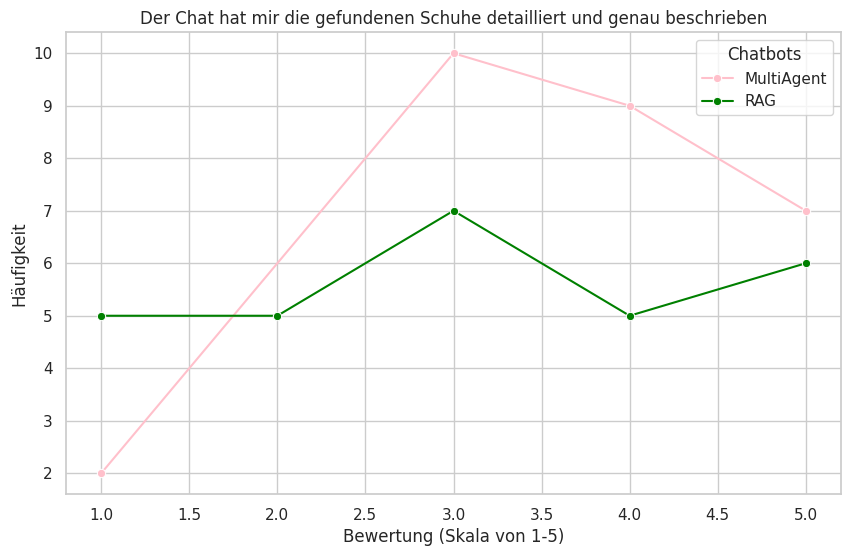

In [20]:
# Auswertung dafür welche Chatbot man bevorzugen würde

import seaborn as sns
import matplotlib.pyplot as plt

# Spaltennamen für die Visualisierung

column_preference = "Welchen Chatbot würden Sie bevorzugen"

# Zähle die Anzahl der Vorkommen jeder Präferenz
preference_counts = df_gesamt[column_preference].value_counts()

# Ersetze die Originalwerte durch gewünschte Labels
preference_counts.index = preference_counts.index.map({"Chatbot 1": "MultiAgent", "Chatbot 2": "RAG"})

# Erstellen eines Pie-Charts
plt.figure(figsize=(8, 8))
plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Verteilung der Chatbot-Präferenzen Umfrage Gesamt')
plt.show()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Erstelle ein Beispiel DataFrame
data = {
    'MultiAgent': [1, 4, 3, 5, 4, 3, 5, 4, 1, 4, 3, 3, 4, 4, 5, 5, 4, 3, 5, 3, 5, 3, 3, 3, 4, 5, 3, 4],
    'RAG': [1, 4, 3, 4, 2, 5, 5, 5, 2, 3, 1, 5, 5, 4, 5, 1, 3, 3, 3, 3, 1, 4, 3, 4, 2, 1, 2, 2]
}

df = pd.DataFrame(data)

# Plot mit Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Häufigkeit der Bewertungen pro Chatbot zählen
count_df = pd.DataFrame({
    'MultiAgent': df['MultiAgent'].value_counts().sort_index(),
    'RAG': df['RAG'].value_counts().sort_index(),
}).reset_index()

# Melt DataFrame für den Scatterplot
count_df_melted = count_df.melt(id_vars='index', var_name='Chatbot', value_name='Häufigkeit')

# Scatterplot mit Linien für jeden Chatbot
sns.lineplot(data=count_df_melted[count_df_melted['Chatbot'] == 'MultiAgent'], x="index", y="Häufigkeit", color="pink", marker="o", label="MultiAgent")
sns.lineplot(data=count_df_melted[count_df_melted['Chatbot'] == 'RAG'], x="index", y="Häufigkeit", color="green", marker="o", label="RAG")

# Legende hinzufügen
plt.legend(title='Chatbots', loc='upper right')

# Achsentitel
plt.xlabel('Bewertung (Skala von 1-5)')
plt.ylabel('Häufigkeit')

# Titel hinzufügen
plt.title('Der Chat hat mir die gefundenen Schuhe detailliert und genau beschrieben')

# Diagramm anzeigen
plt.show()







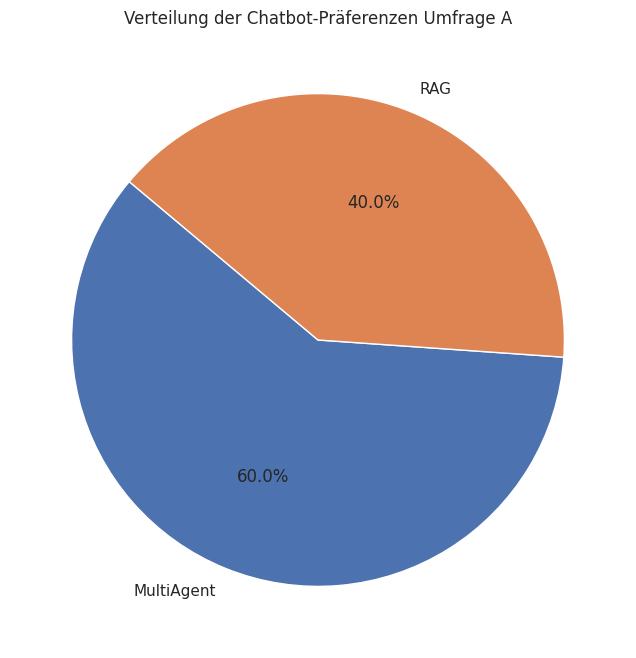

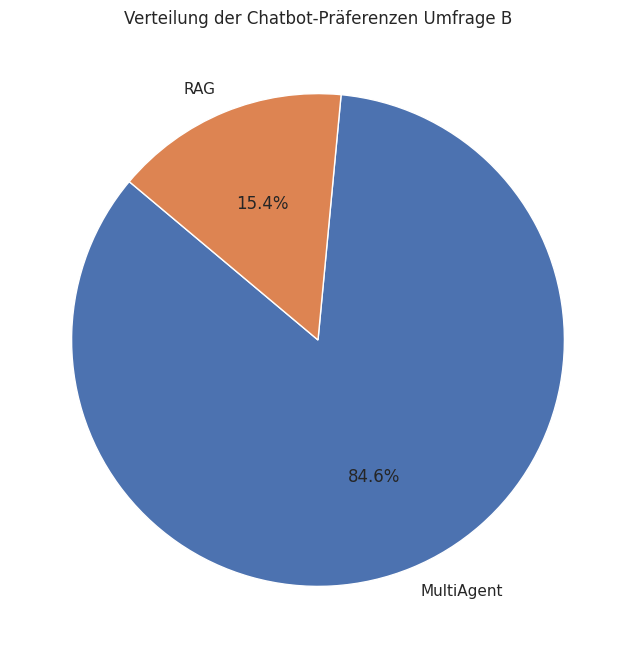

ValueError: Length of RangeIndex vectors must match length of `data` when both are used, but `data` has length 56 and the vector passed to `x` has length 28.

<Figure size 1000x600 with 0 Axes>

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Spaltennamen für die Visualisierung
column_preference = "Welchen Chatbot würden Sie bevorzugen"

# Zähle die Anzahl der Vorkommen jeder Präferenz
preference_counts = df_a[column_preference].value_counts()

# Ersetze die Originalwerte durch gewünschte Labels
preference_counts.index = preference_counts.index.map({"Chatbot 1": "MultiAgent", "Chatbot 2": "RAG"})

# Erstellen eines Pie-Charts
plt.figure(figsize=(8, 8))
plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Verteilung der Chatbot-Präferenzen Umfrage A')
plt.show()


preference_counts = df_b[column_preference].value_counts()

# Ersetze die Originalwerte durch gewünschte Labels
preference_counts.index = preference_counts.index.map({"Chatbot 1": "RAG", "Chatbot 2": "MultiAgent"})

# Erstellen eines Pie-Charts
plt.figure(figsize=(8, 8))
plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Verteilung der Chatbot-Präferenzen Umfrage B')
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Erstelle ein Beispiel DataFrame
data = {
    'MultiAgent': [1, 4, 3, 5, 4, 3, 5, 4, 1, 4, 3, 3, 4, 4, 5, 5, 4, 3, 5, 3, 5, 3, 3, 3, 4, 5, 3, 4],
    'RAG': [1, 4, 3, 4, 2, 5, 5, 5, 2, 3, 1, 5, 5, 4, 5, 1, 3, 3, 3, 3, 1, 4, 3, 4, 2, 1, 2, 2]
}

df = pd.DataFrame(data)

# Sortiere das DataFrame in absteigender Reihenfolge
df = df[::-1]

# Plot mit Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatterplot mit Linien für jeden Chatbot
sns.lineplot(data=df.melt(), x=df.index, y="value", hue="variable", palette={"MultiAgent": "pink", "RAG": "green"}, marker="o", sort=False)

# Legende hinzufügen
plt.legend(title='Chatbots', loc='upper right', labels=['MultiAgent', 'RAG'])

# Achsentitel
plt.xlabel('Datenpunkt')
plt.ylabel('Bewertung (Skala von 1-5)')

# Titel hinzufügen
plt.title('Der Chat hat mir die gefundenen Schuhe detailliert und genau beschrieben')

# Diagramm anzeigen
plt.show()



